<img src="https://drive.google.com/uc?export=view&id=10mKgunAZowpvpttdYdjoDeCM2RSMGXer" width="100%">

In [1]:
pip install kaggle

In [2]:
import os
from google.colab import files

# Subir el archivo kaggle.json
uploaded = files.upload()

# Crear el directorio .kaggle y mover el archivo
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip heart-failure-clinical-data.zip
import pandas as pd
df_insuficiencia_cardiaca = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 9.79MB/s]
Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


# **Tipos Variables**
---

Este notebook realiza a través de google colaboratory la identificación de tipos de variables para el proyecto Predicción Insuficiencia Cardiaca Utilizando Técnicas de Machine Learning.

Esta desarrollado por:

- Henry Hernán Bolaños Bravo
- Wilson Ricardo Torres Morales

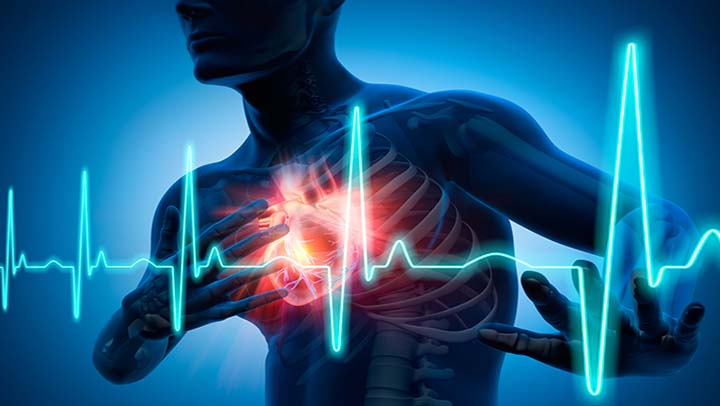

## **1. Variables Objetivos**
---

A continuación se realiza la identificación de variables objetivos de insuficiencia cardiaca. Los resultados muestran que hay 6 variables objetivos que son

anaemia -> Anemia

diabetes -> Diabates

high_blood_pressure -> hipertensión

sex -> Sexo

smoking Fuma o No Fuma

DEATH_EVENT Variable Prediccion Insuficiencia Cardíaca


In [3]:
import pandas as pd

def identify_categorical_variables_int(df, threshold=10):
    """
    Identifica las variables categóricas representadas como enteros en un DataFrame.
    Las variables categóricas representadas como enteros son aquellas que tienen un
    número limitado de valores únicos, generalmente menos de un cierto umbral.

    Parámetros:
    - df: pandas DataFrame con los datos a analizar.
    - threshold: Umbral para el número máximo de valores únicos en una columna para
      considerarse categórica. Por defecto la dejaremos en 10.

    Retorna:
    - Una lista con los nombres de las columnas categóricas.
    """
    categorical_columns = []

    # Recorremos las columnas del DataFrame que son de tipo entero (int)
    for col in df.select_dtypes(include=['int64', 'int32', 'float64']).columns:
        # Si el número de valores únicos es menor que el umbral, lo consideramos categórico
        if len(df[col].unique()) <= threshold:
            categorical_columns.append(col)

    return categorical_columns


identify_categorical_variables_int(df_insuficiencia_cardiaca)


['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

## **1.1. Histogramas de Variables Objetivos**
---

A continuación se realiza la visualización de histograma de variables objetivos de insuficiencia cardiacapara cada una de las 6 variables objetivos

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histogram(df, column, bins=10, color='skyblue', edgecolor='black', alpha=0.7):
    """
    Función que pinta un histograma de una columna del DataFrame, asegurando que
    los valores del eje X y Y sean enteros y se visualicen bien, con las frecuencias en el eje Y
    mostradas en intervalos de 20.

    Parámetros:
    - df: pandas DataFrame.
    - column: Nombre de la columna para la cual se quiere pintar el histograma.
    - bins: Número de intervalos en el histograma (por defecto 10).
    - color: Color de las barras del histograma (por defecto 'skyblue').
    - edgecolor: Color de los bordes de las barras (por defecto 'black').
    - alpha: Transparencia de las barras (por defecto 0.7).
    """
    plt.figure(figsize=(8, 6))

    # Histograma
    counts, edges, patches = plt.hist(df[column], bins=bins, color=color, edgecolor=edgecolor, alpha=alpha)
    if column == 'anaemia':
        title = 'Anemia'
    else:
        title = column

    # Añadir títulos y etiquetas
    plt.title(f'Histograma de {title}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

    # Asegurar que los valores del eje X sean enteros
    plt.xticks(range(int(df[column].min()), int(df[column].max()) + 1, 1))

    # Asegurar que los valores del eje Y se muestren en intervalos de 20
    plt.yticks(range(0, int(max(counts)) + 20, 20))  # Mostrar etiquetas cada 20 unidades en el eje Y

    # Opcional: Mejorar la visibilidad de las frecuencias en el eje Y
    # Si la frecuencia es muy alta, se puede usar un formato con separadores de miles
    if max(counts) > 100:
        plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: '{:,}'.format(int(x))))

    # Mostrar el gráfico
    plt.show()


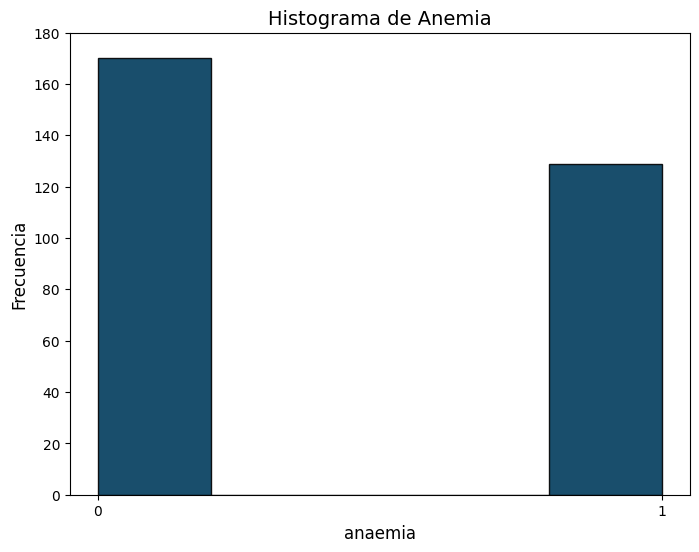

In [5]:
plot_histogram(df_insuficiencia_cardiaca, 'anaemia', bins=5, color='#003B5C', edgecolor='black', alpha=0.9)

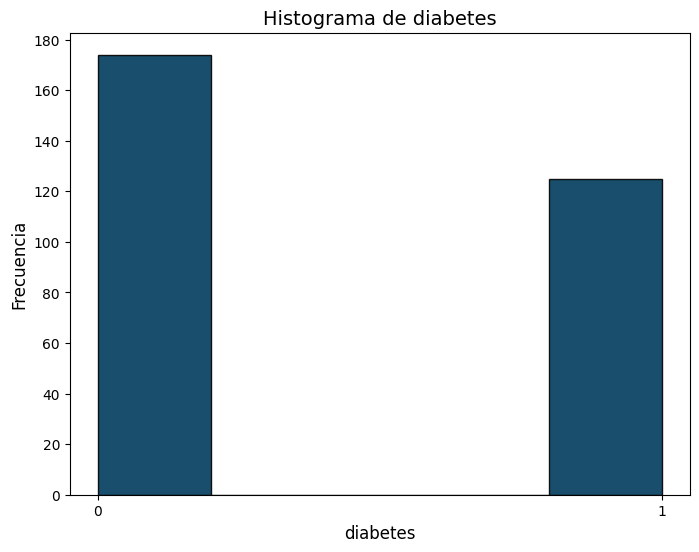

In [6]:
plot_histogram(df_insuficiencia_cardiaca, 'diabetes', bins=5, color='#003B5C', edgecolor='black', alpha=0.9)

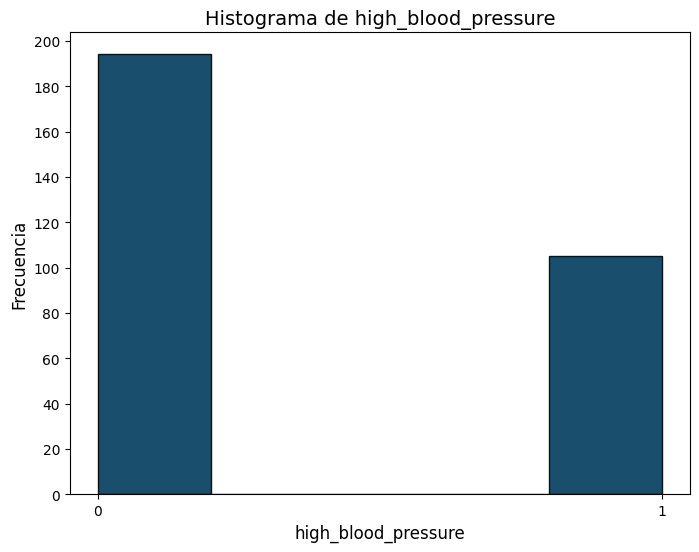

In [7]:
plot_histogram(df_insuficiencia_cardiaca, 'high_blood_pressure', bins=5, color='#003B5C', edgecolor='black', alpha=0.9)

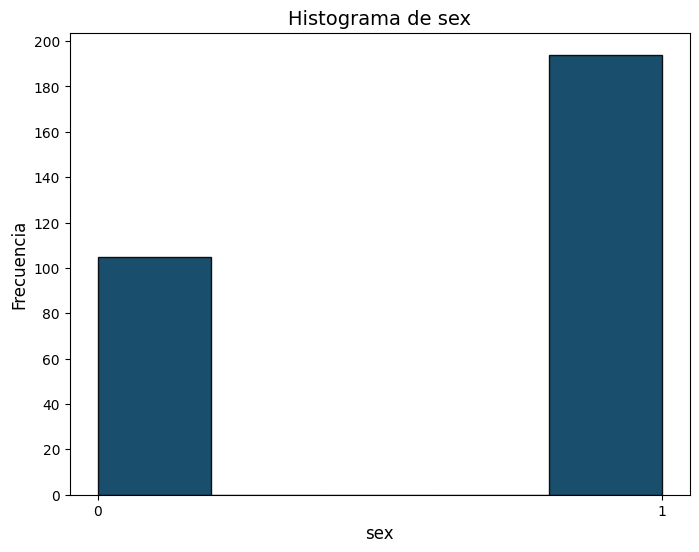

In [8]:
plot_histogram(df_insuficiencia_cardiaca, 'sex', bins=5, color='#003B5C', edgecolor='black', alpha=0.9)

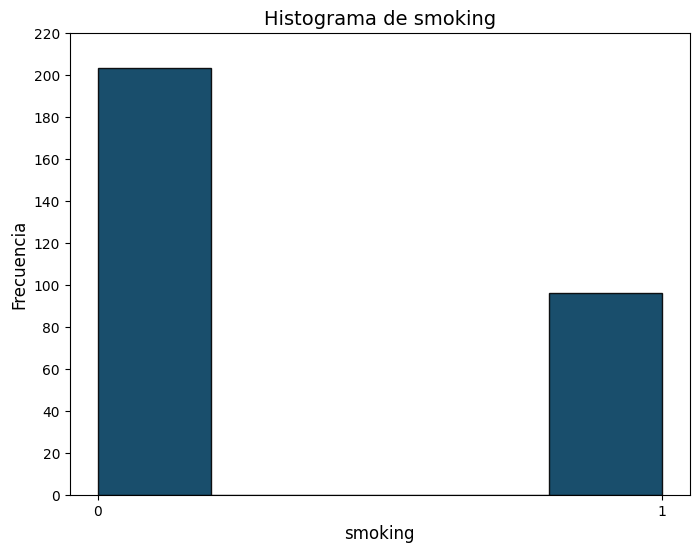

In [9]:
plot_histogram(df_insuficiencia_cardiaca, 'smoking', bins=5, color='#003B5C', edgecolor='black', alpha=0.9)

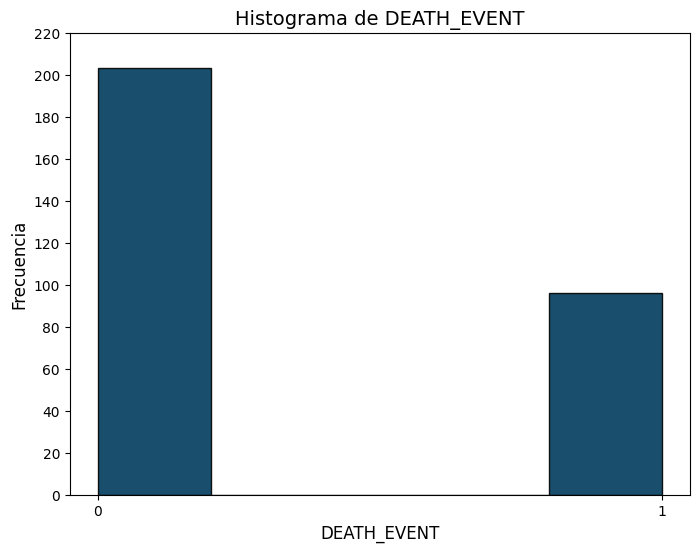

In [10]:
plot_histogram(df_insuficiencia_cardiaca, 'DEATH_EVENT', bins=5, color='#003B5C', edgecolor='black', alpha=0.9)

Distribución de la variable objetivo 'DEATH_EVENT':
DEATH_EVENT
0    67.892977
1    32.107023
Name: proportion, dtype: float64


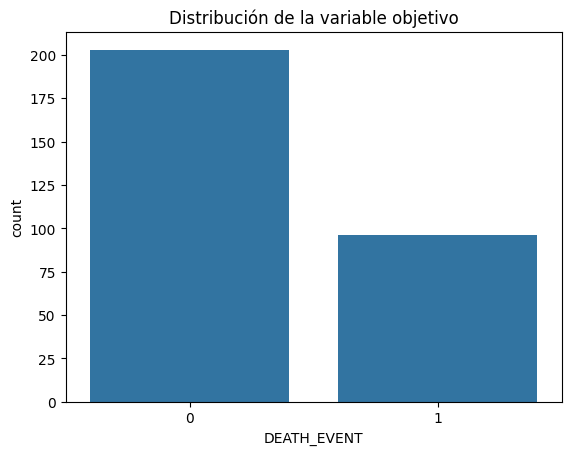

In [31]:
import numpy as np
target = 'DEATH_EVENT'
# Identificar la variable objetivo
target = 'DEATH_EVENT'  # Reemplazar con el nombre correcto si es distinto
print(f"Distribución de la variable objetivo '{target}':")
print(df_insuficiencia_cardiaca[target].value_counts(normalize=True) * 100)

# Gráfico de distribución de la variable objetivo
sns.countplot(x=target, data=df_insuficiencia_cardiaca)
plt.title("Distribución de la variable objetivo")
plt.savefig("Distribución_Objetivo.png", format='png')
plt.show()


## **2. Distribución de las etiquetas, identificación desbalanceo de datos**
---

A continuación se realiza la distribución de las etiquetas, identificación desbalanceo de datos de insuficiencia cardiaca.

Se evidencia que no hay desbalanceo en las 6 variables objetivos a un 35% de margen.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def distribucion_balanceo(distribucion_etiquetas, df, etiqueta):
    # 1. Imprimir la distribución de etiquetas
    print("Distribución de etiquetas:")
    print(distribucion_etiquetas)

    # 2. Verificar las columnas del DataFrame
    print("\nColumnas del DataFrame:")
    print(df.columns)

    # 3. Visualizar la distribución
    plt.figure(figsize=(8, 6))

    # Asegurarse de que el nombre de la columna 'etiqueta' exista en el DataFrame
    if etiqueta in df.columns:
        sns.countplot(data=df, x=etiqueta, palette='viridis')
        plt.title('Distribución de etiquetas')
        plt.xlabel('Etiquetas')
        plt.ylabel('Frecuencia')
        plt.show()
    else:
        print("La columna 'etiqueta' no se encuentra en el DataFrame.")

    # 4. Calcular porcentajes
    porcentajes = distribucion_etiquetas / len(df) * 100
    print("\nPorcentaje de cada etiqueta:")
    print(porcentajes)

    # 5. Verificar desbalanceo
    desbalanceo = porcentajes.min() < 30  # Por ejemplo, umbral del 20% para considerar desbalanceo
    if desbalanceo:
        print("\nEl conjunto de datos está desbalanceado.")
    else:
        print("\nEl conjunto de datos está balanceado.")

## **2.1. Distribución y balanceo de Anemia**
---


Distribución de etiquetas:
anaemia
0    170
1    129
Name: count, dtype: int64

Columnas del DataFrame:
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


<ipython-input-11-2fccc3f94d37>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=etiqueta, palette='viridis')


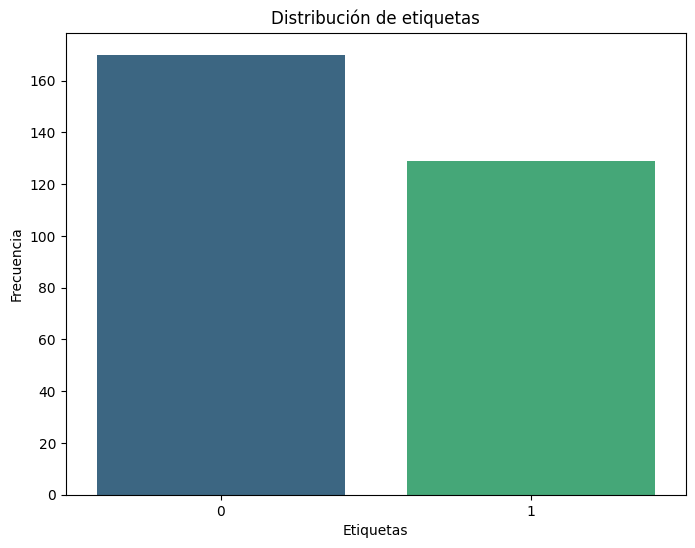


Porcentaje de cada etiqueta:
anaemia
0    56.856187
1    43.143813
Name: count, dtype: float64

El conjunto de datos está balanceado.


In [12]:
# Contar las ocurrencias de cada etiqueta
distribucion_etiquetas = df_insuficiencia_cardiaca['anaemia'].value_counts()

# Llamar a la función
distribucion_balanceo(distribucion_etiquetas, df_insuficiencia_cardiaca,'anaemia')

## **2.2. Distribución y balanceo de Diabetes**
---


Distribución de etiquetas:
diabetes
0    174
1    125
Name: count, dtype: int64

Columnas del DataFrame:
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


<ipython-input-11-2fccc3f94d37>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=etiqueta, palette='viridis')


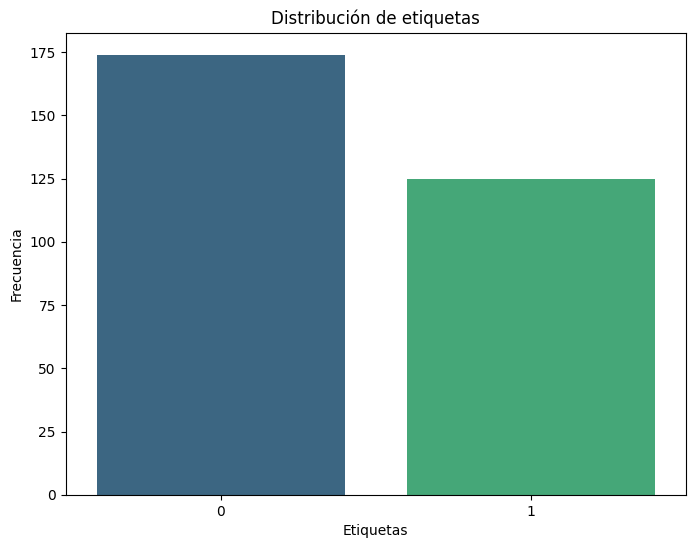


Porcentaje de cada etiqueta:
diabetes
0    58.19398
1    41.80602
Name: count, dtype: float64

El conjunto de datos está balanceado.


In [13]:
# Contar las ocurrencias de cada etiqueta
distribucion_etiquetas = df_insuficiencia_cardiaca['diabetes'].value_counts()

# Llamar a la función
distribucion_balanceo(distribucion_etiquetas, df_insuficiencia_cardiaca,'diabetes')

## **2.3. Distribución y balanceo de Hipertension**
---


Distribución de etiquetas:
high_blood_pressure
0    194
1    105
Name: count, dtype: int64

Columnas del DataFrame:
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


<ipython-input-11-2fccc3f94d37>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=etiqueta, palette='viridis')


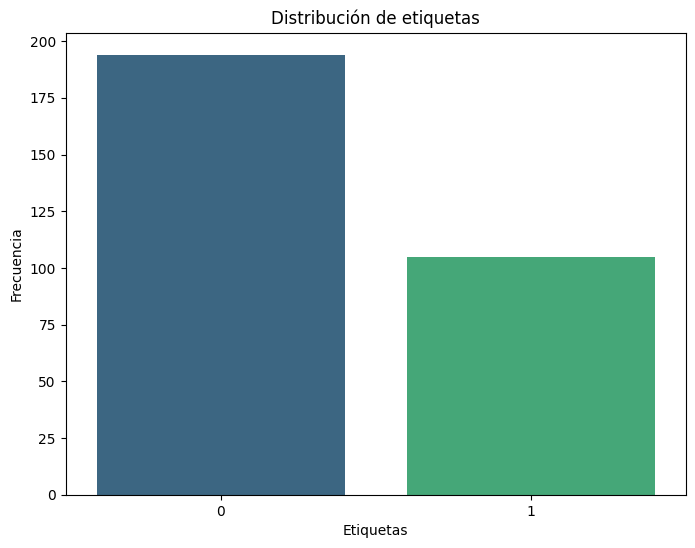


Porcentaje de cada etiqueta:
high_blood_pressure
0    64.882943
1    35.117057
Name: count, dtype: float64

El conjunto de datos está balanceado.


In [14]:
# Contar las ocurrencias de cada etiqueta
distribucion_etiquetas = df_insuficiencia_cardiaca['high_blood_pressure'].value_counts()

# Llamar a la función
distribucion_balanceo(distribucion_etiquetas, df_insuficiencia_cardiaca,'high_blood_pressure')

## **2.4. Distribución y balanceo de Sexo**
---


Distribución de etiquetas:
sex
1    194
0    105
Name: count, dtype: int64

Columnas del DataFrame:
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


<ipython-input-11-2fccc3f94d37>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=etiqueta, palette='viridis')


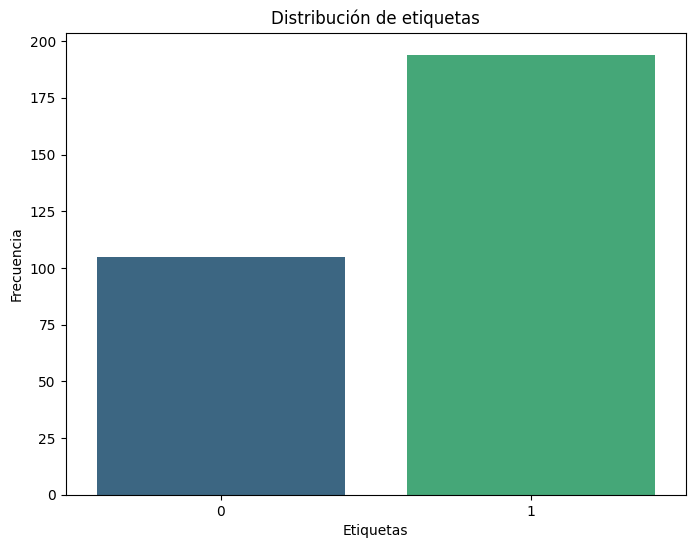


Porcentaje de cada etiqueta:
sex
1    64.882943
0    35.117057
Name: count, dtype: float64

El conjunto de datos está balanceado.


In [15]:
# Contar las ocurrencias de cada etiqueta
distribucion_etiquetas = df_insuficiencia_cardiaca['sex'].value_counts()

# Llamar a la función
distribucion_balanceo(distribucion_etiquetas, df_insuficiencia_cardiaca,'sex')

## **2.5. Distribución y balanceo de Fumar**
---


Distribución de etiquetas:
smoking
0    203
1     96
Name: count, dtype: int64

Columnas del DataFrame:
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


<ipython-input-11-2fccc3f94d37>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=etiqueta, palette='viridis')


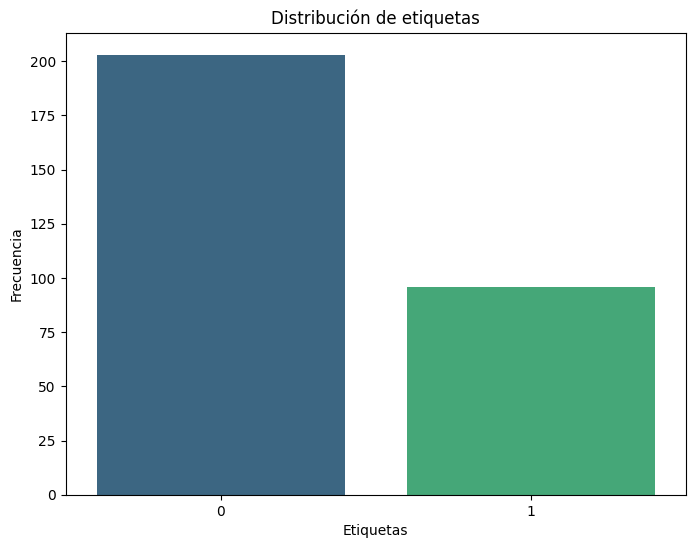


Porcentaje de cada etiqueta:
smoking
0    67.892977
1    32.107023
Name: count, dtype: float64

El conjunto de datos está balanceado.


In [16]:
# Contar las ocurrencias de cada etiqueta
distribucion_etiquetas = df_insuficiencia_cardiaca['smoking'].value_counts()

# Llamar a la función
distribucion_balanceo(distribucion_etiquetas, df_insuficiencia_cardiaca,'smoking')

## **3. Variable Catégorica**
---

A continuación se realiza la identicacion de la variable categórica que corresponde a la predicción de si un paciente tien una complicación por insuficiencia cardíaca


Distribución de etiquetas:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Columnas del DataFrame:
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


<ipython-input-11-2fccc3f94d37>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=etiqueta, palette='viridis')


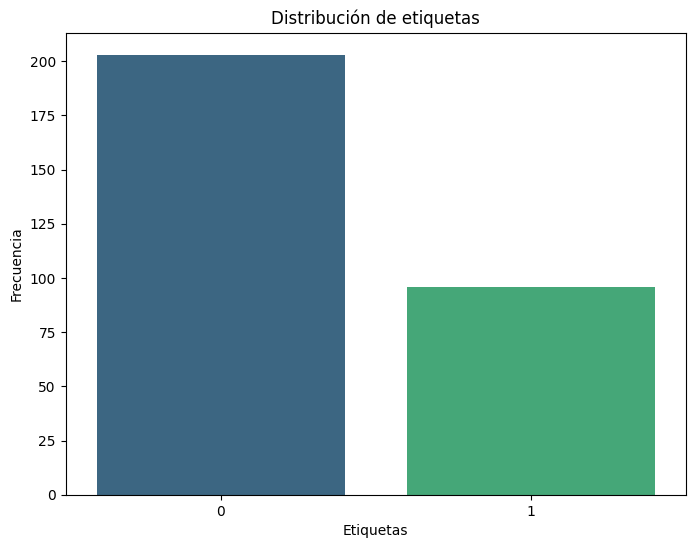


Porcentaje de cada etiqueta:
DEATH_EVENT
0    67.892977
1    32.107023
Name: count, dtype: float64

El conjunto de datos está balanceado.


In [17]:
# Contar las ocurrencias de cada etiqueta
distribucion_etiquetas = df_insuficiencia_cardiaca['DEATH_EVENT'].value_counts()

# Llamar a la función
distribucion_balanceo(distribucion_etiquetas, df_insuficiencia_cardiaca,'DEATH_EVENT')

## **4. Relacion y Correlacion entre variables**
---

A continuación se realiza la relación y cirrelacipon entre variables de las 6 variables de insuficiencia cardiaca.



## 5.Relación entre variables más importantes y la variable objetivo

                      anaemia  diabetes  high_blood_pressure  sex   smoking  \
anaemia              1.000000 -0.012729             0.038182  NaN -0.107290   
diabetes            -0.012729  1.000000            -0.012732  NaN -0.147173   
high_blood_pressure  0.038182 -0.012732             1.000000  NaN -0.055711   
sex                       NaN       NaN                  NaN  NaN       NaN   
smoking             -0.107290 -0.147173            -0.055711  NaN  1.000000   
DEATH_EVENT          0.066270 -0.001943             0.079351  NaN -0.012623   

                     DEATH_EVENT  
anaemia                 0.066270  
diabetes               -0.001943  
high_blood_pressure     0.079351  
sex                          NaN  
smoking                -0.012623  
DEATH_EVENT             1.000000  


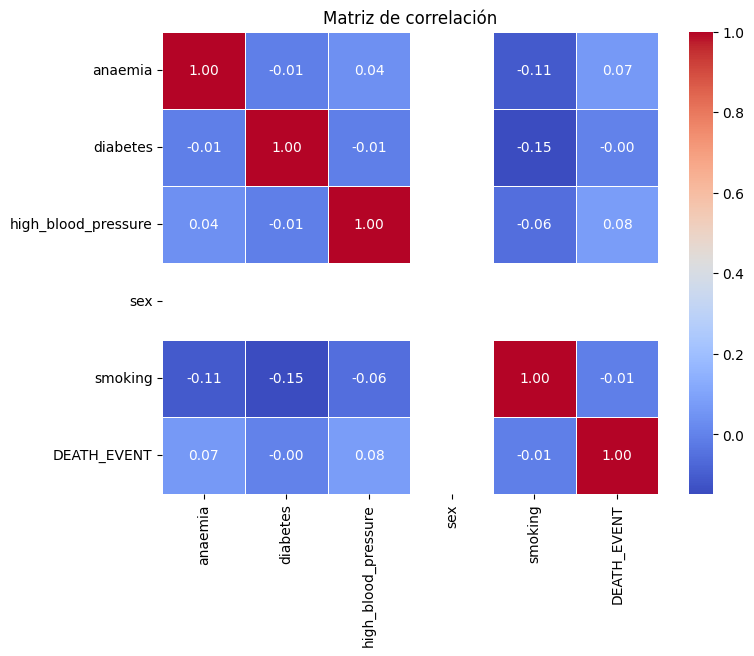

In [18]:
import pandas as pd

# Suponiendo que tienes un DataFrame 'df' con las variables indicadas
# Asegúrate de que las columnas estén en formato numérico (0 y 1) para variables categóricas

# Ejemplo de codificación de variables categóricas si es necesario
df_insuficiencia_cardiaca['anaemia'] = df_insuficiencia_cardiaca['anaemia'].astype(int)
df_insuficiencia_cardiaca['diabetes'] = df_insuficiencia_cardiaca['diabetes'].astype(int)
df_insuficiencia_cardiaca['high_blood_pressure'] = df_insuficiencia_cardiaca['high_blood_pressure'].astype(int)
df_insuficiencia_cardiaca['sex'] = df_insuficiencia_cardiaca['sex'].map({'male': 1, 'female': 0})  # Si 'sex' es categórico con valores 'male' y 'female'
df_insuficiencia_cardiaca['smoking'] = df_insuficiencia_cardiaca['smoking'].astype(int)
df_insuficiencia_cardiaca['DEATH_EVENT'] = df_insuficiencia_cardiaca['DEATH_EVENT'].astype(int)

# Seleccionamos solo las columnas que queremos correlacionar
columns_to_correlate = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

# Calculamos la correlación entre las variables
correlation_matrix = df_insuficiencia_cardiaca[columns_to_correlate].corr()

# Mostramos la matriz de correlación
print(correlation_matrix)

# Opcional: Visualizar la matriz de correlación con un mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()


In [19]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia para dos variables categóricas
tabla_contingencia = pd.crosstab(df_insuficiencia_cardiaca['anaemia'], df_insuficiencia_cardiaca['DEATH_EVENT'])
#['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
# Aplicar el test Chi-cuadrado
chi2, p, dof, ex = chi2_contingency(tabla_contingencia)

print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")

Estadístico Chi-cuadrado: 1.042175485287005
P-valor: 0.3073160508415107


In [20]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia para dos variables categóricas
tabla_contingencia = pd.crosstab(df_insuficiencia_cardiaca['diabetes'], df_insuficiencia_cardiaca['DEATH_EVENT'])
#['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
# Aplicar el test Chi-cuadrado
chi2, p, dof, ex = chi2_contingency(tabla_contingencia)

print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")

Estadístico Chi-cuadrado: 0.0
P-valor: 1.0


In [21]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia para dos variables categóricas
tabla_contingencia = pd.crosstab(df_insuficiencia_cardiaca['high_blood_pressure'], df_insuficiencia_cardiaca['DEATH_EVENT'])
#['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
# Aplicar el test Chi-cuadrado
chi2, p, dof, ex = chi2_contingency(tabla_contingencia)

print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")

Estadístico Chi-cuadrado: 1.5434607612967581
P-valor: 0.21410341199416902


In [22]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia para dos variables categóricas
tabla_contingencia = pd.crosstab(df_insuficiencia_cardiaca['smoking'], df_insuficiencia_cardiaca['DEATH_EVENT'])
#['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
# Aplicar el test Chi-cuadrado
chi2, p, dof, ex = chi2_contingency(tabla_contingencia)

print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")

Estadístico Chi-cuadrado: 0.007331473567119502
P-valor: 0.9317652998235507


## 6.Gráficos de distribuición para variables numéricas

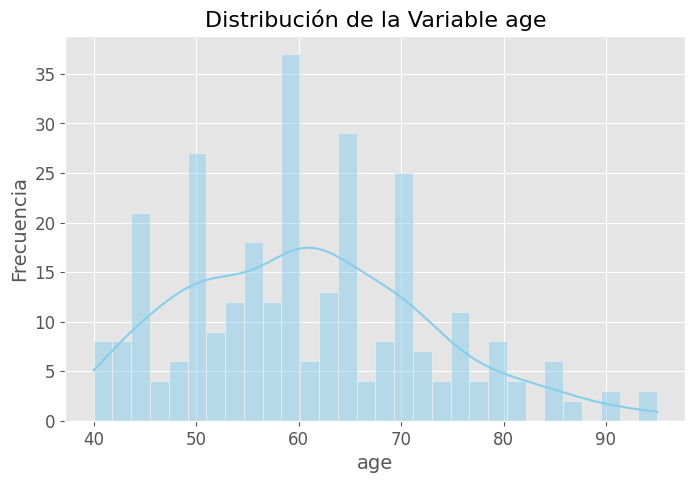

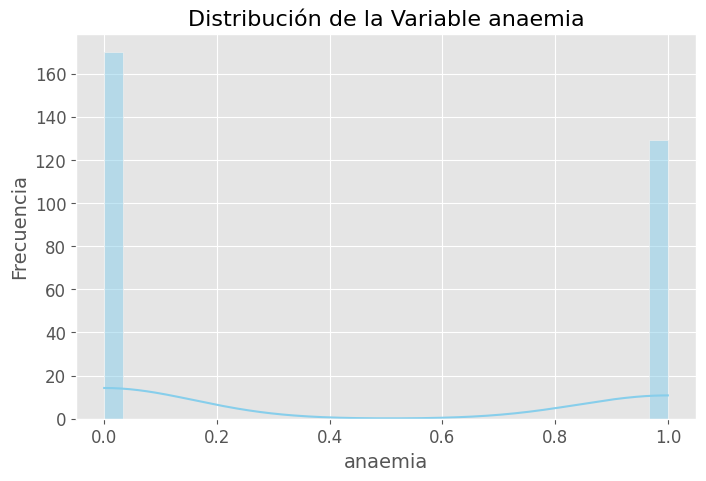

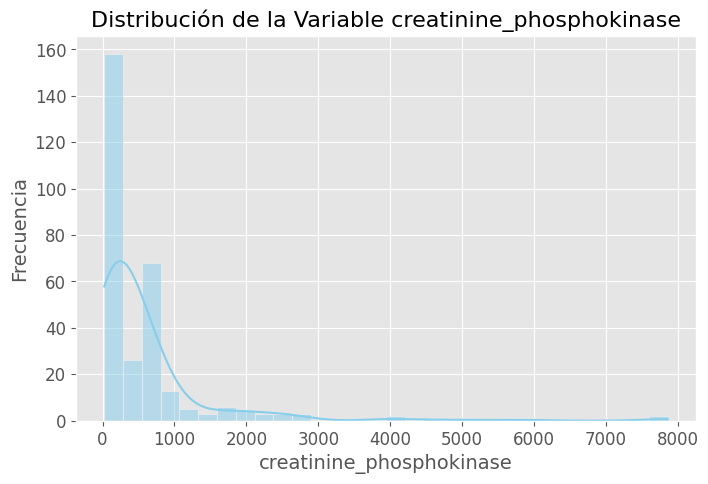

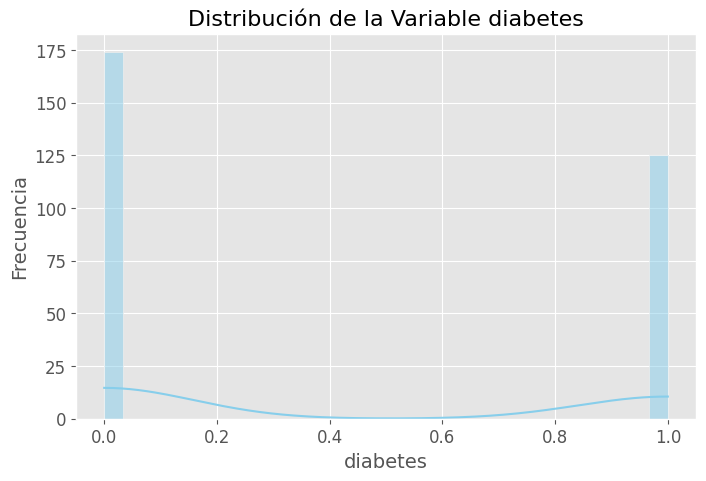

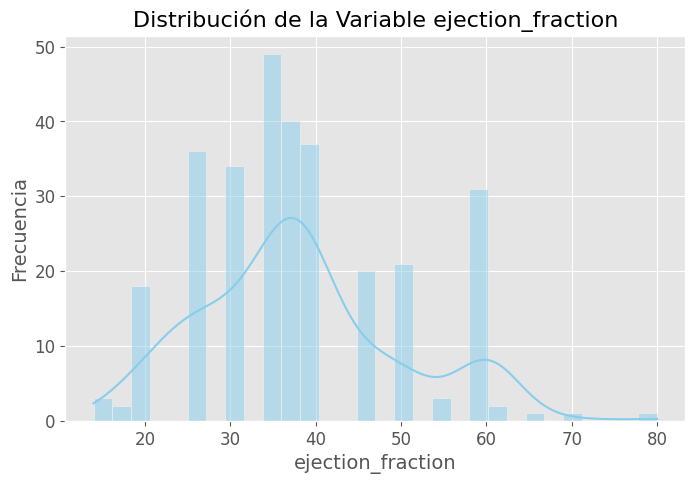

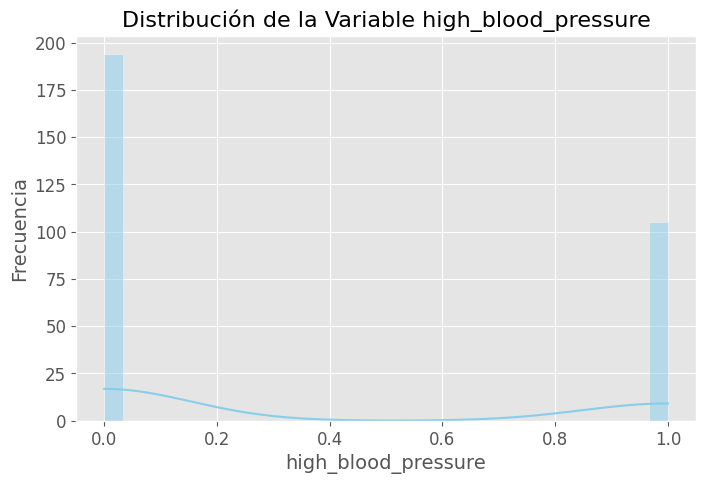

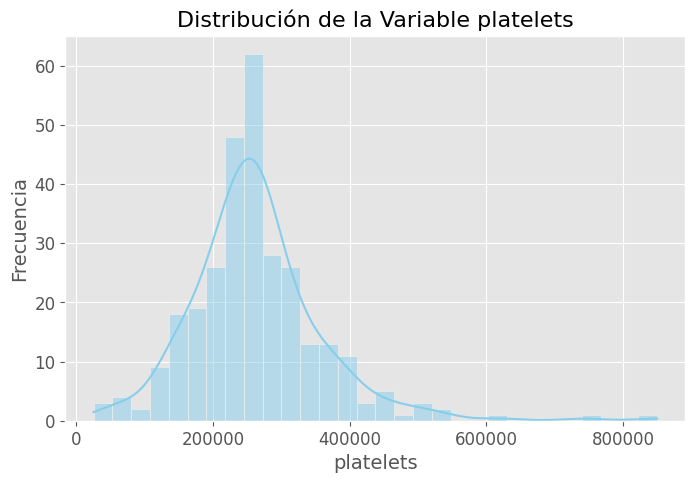

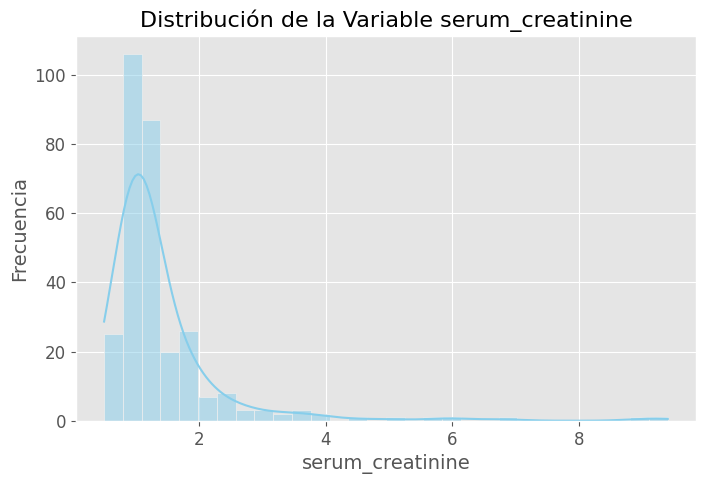

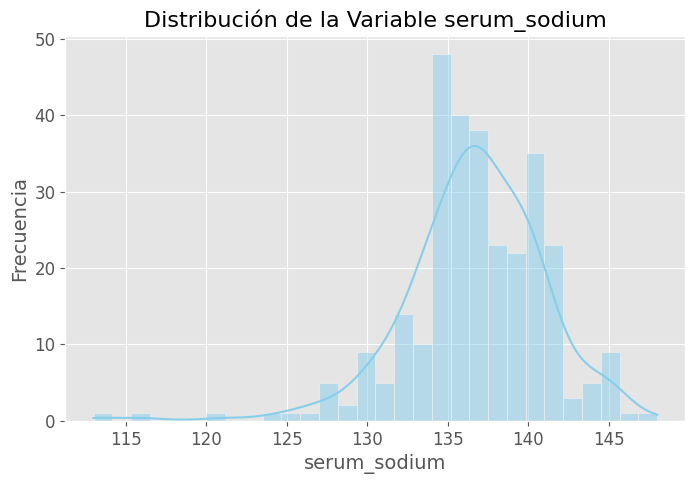

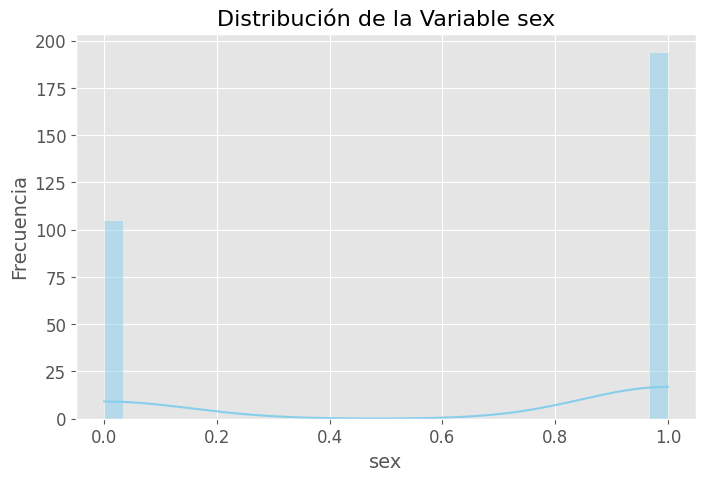

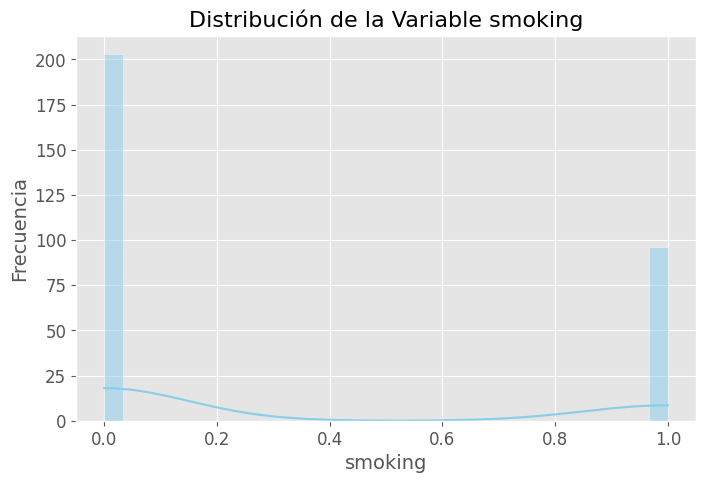

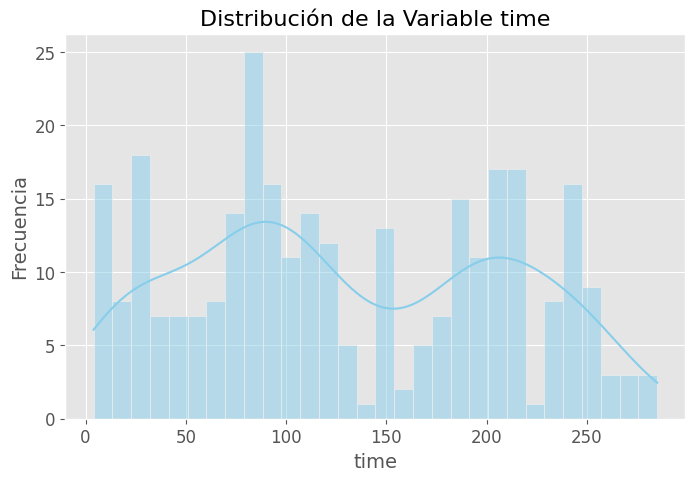

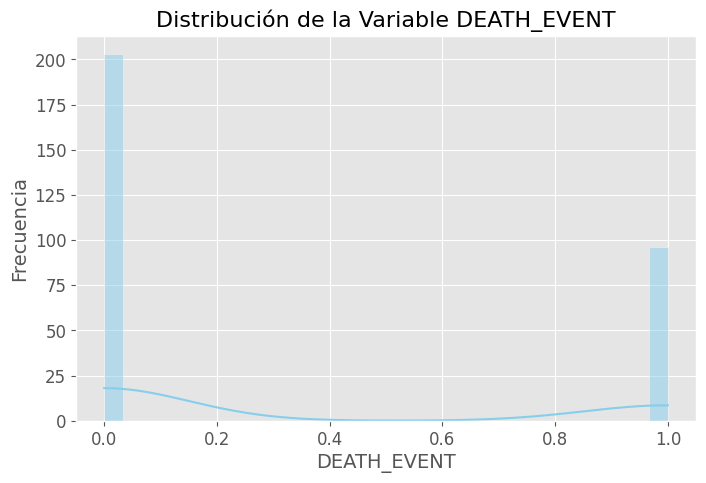

In [ ]:
# Graficar la distribución de cada variable numérica
num_cols = df_insuficiencia_cardiaca.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_insuficiencia_cardiaca[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribución de la Variable {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f"Distribución_Variable{col}.png", format='png')
    plt.show()


## 7.Relación de variables numéricas con la variable objetivo

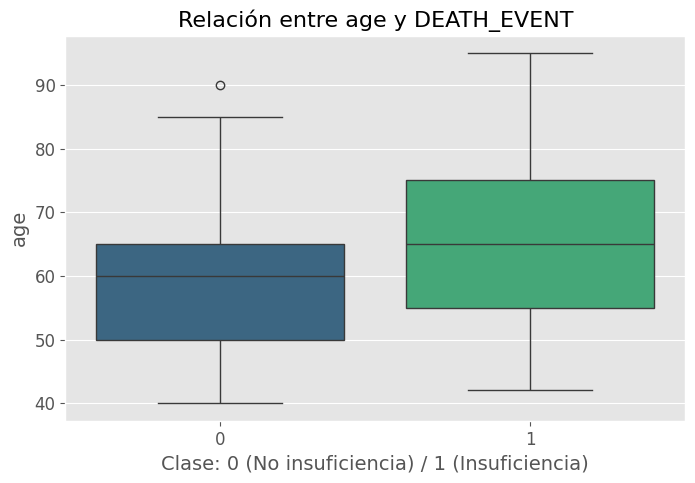

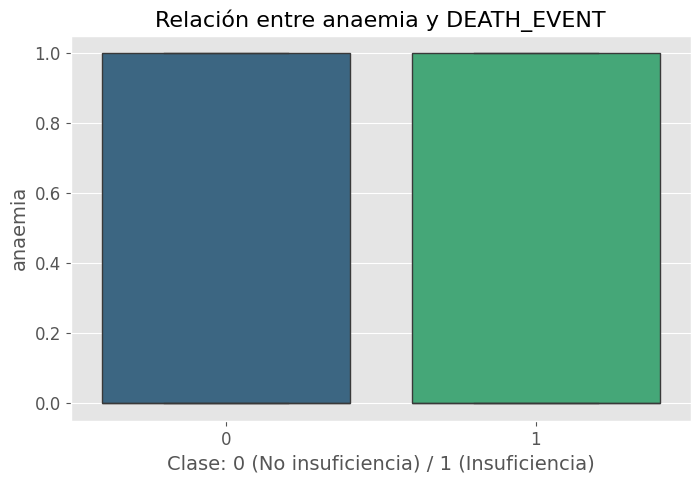

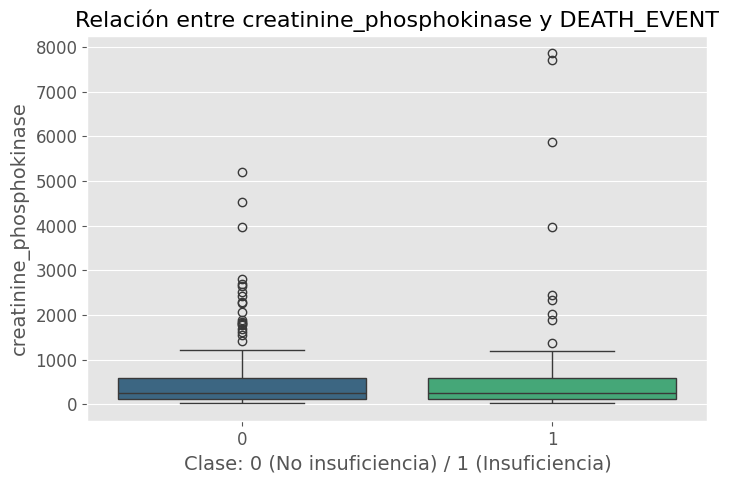

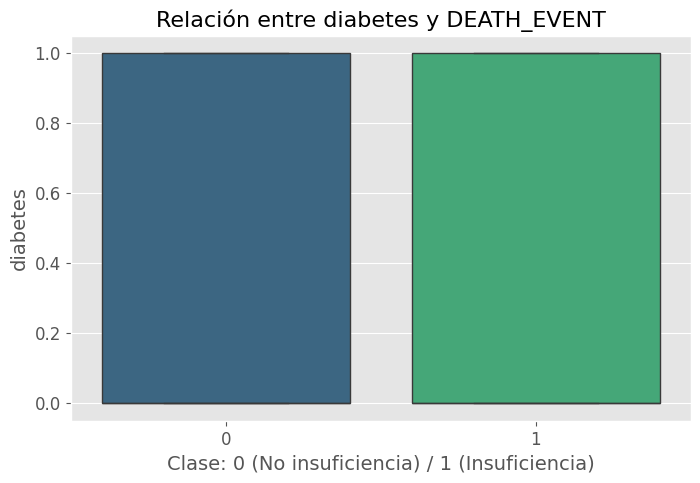

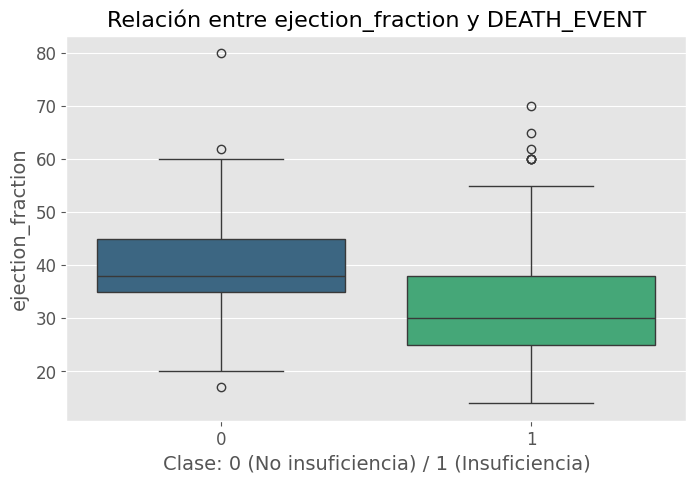

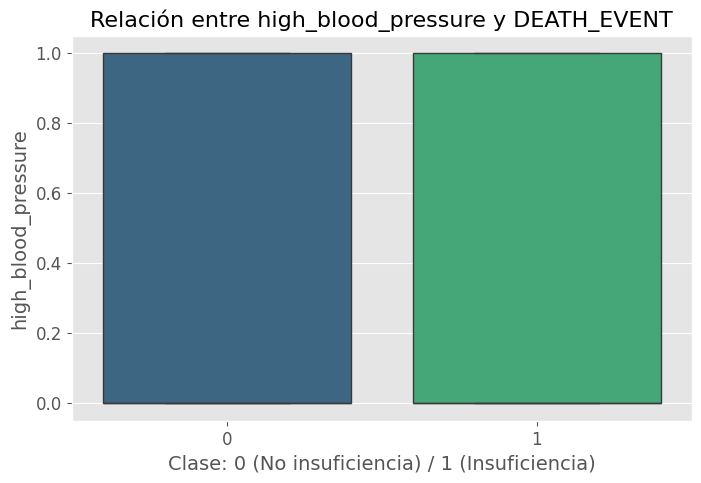

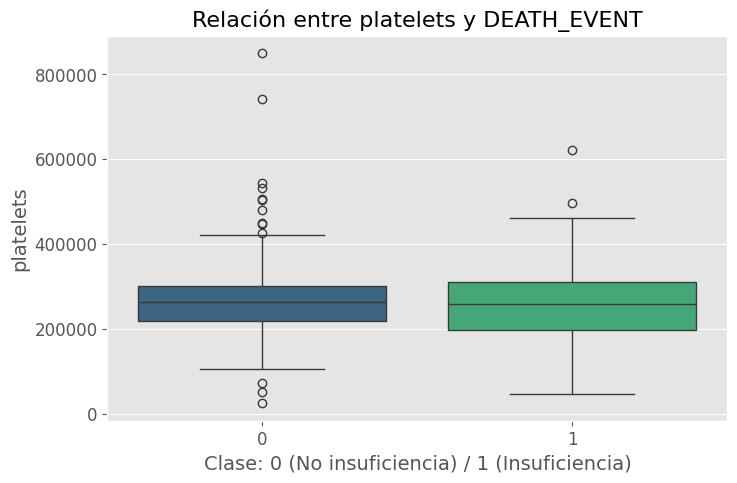

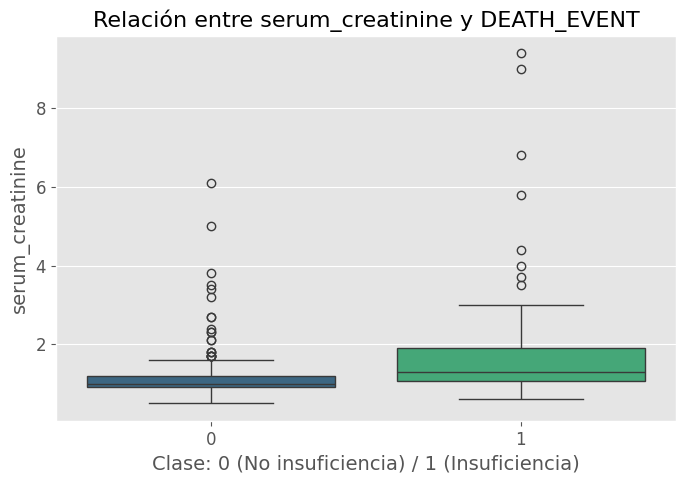

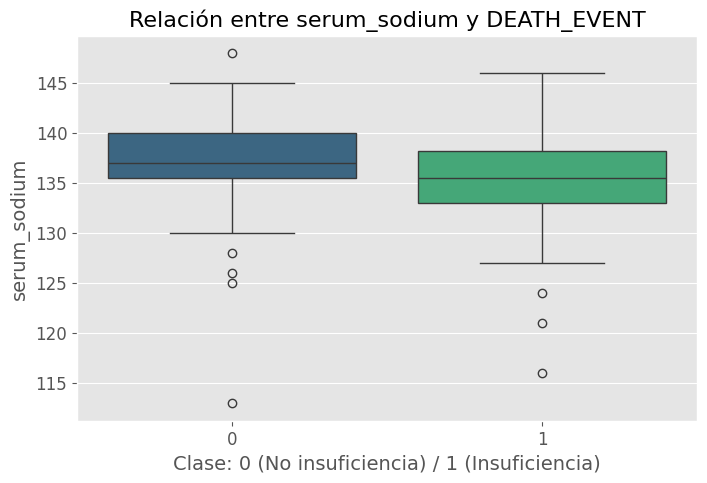

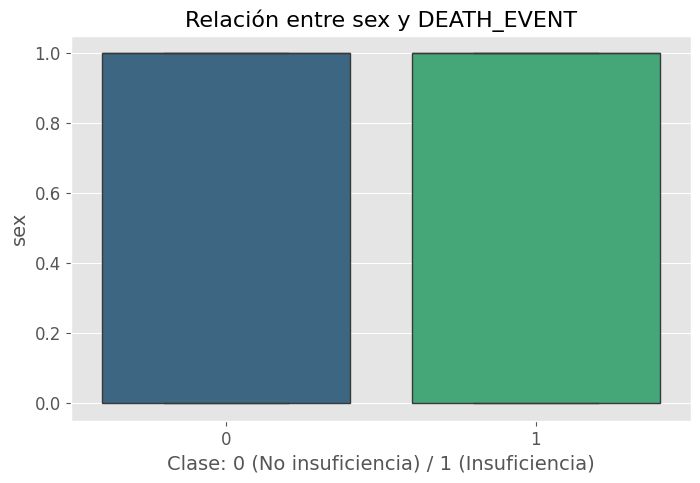

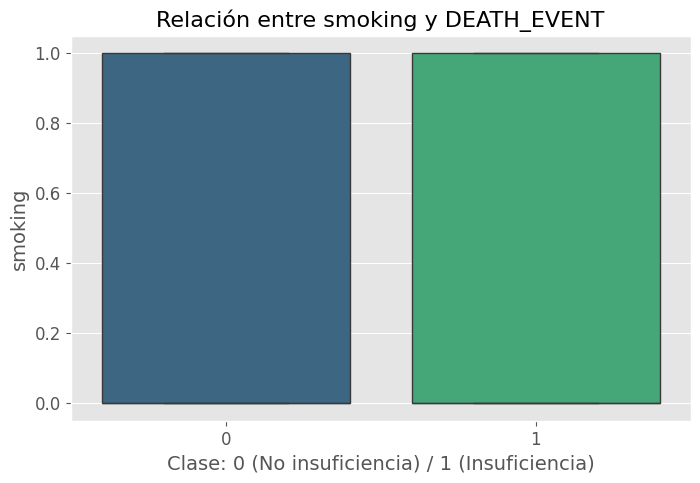

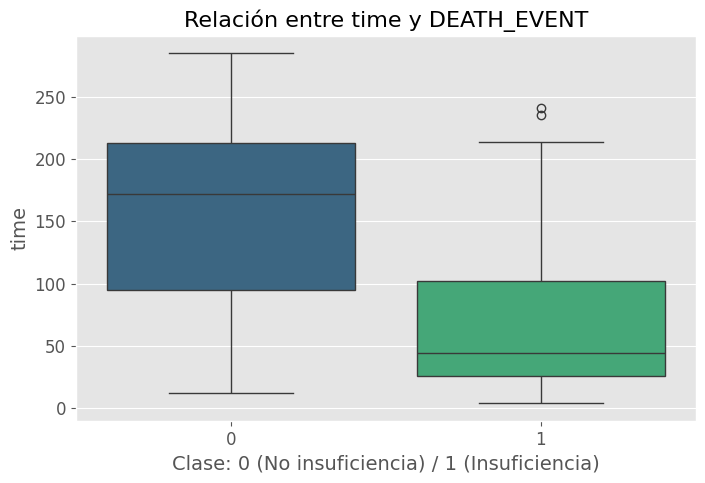

In [ ]:
# Relación entre cada variable numérica y la variable objetivo
for col in num_cols:
    if col != target:  # Excluir la variable objetivo # Changed 'target' (string) to target (variable)
        plt.figure(figsize=(8, 5))
        # Use the actual column name stored in the target variable
        sns.boxplot(x=target, y=col, data=df_insuficiencia_cardiaca, palette='viridis')
        plt.title(f"Relación entre {col} y {target}", fontsize=16)
        plt.xlabel("Clase: 0 (No insuficiencia) / 1 (Insuficiencia)", fontsize=14)
        plt.ylabel(col, fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.savefig(f"Relación_variables_numéricas{col}_{target}.png", format='png')
        plt.show()


## 8.Matriz de correlación

* Una matriz de correlación muestra cómo están relacionadas las variables numéricas con DEATH_EVENT.

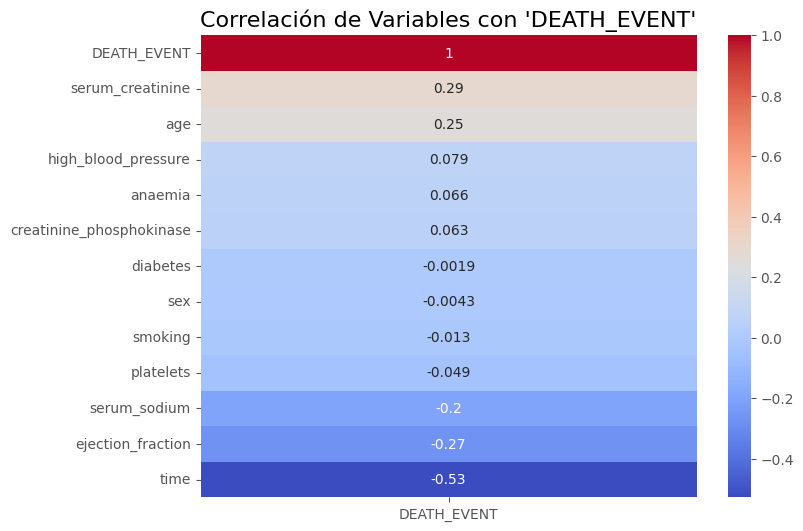

In [ ]:
# Matriz de correlación centrada en la variable objetivo
plt.figure(figsize=(8, 6))
sns.heatmap(df_insuficiencia_cardiaca.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlación de Variables con 'DEATH_EVENT'", fontsize=16)
plt.savefig("Correlación_Variables_DEATH_EVENT.png", format='png')
plt.show()


## 9.Ranking de Variables


Ranking de importancia de las variables:
                    Variable  Importancia
11                      time     0.344041
7           serum_creatinine     0.141477
4          ejection_fraction     0.119073
0                        age     0.091657
2   creatinine_phosphokinase     0.087620
6                  platelets     0.081932
8               serum_sodium     0.074636
3                   diabetes     0.012655
9                        sex     0.012531
10                   smoking     0.012523
1                    anaemia     0.011405
5        high_blood_pressure     0.010449


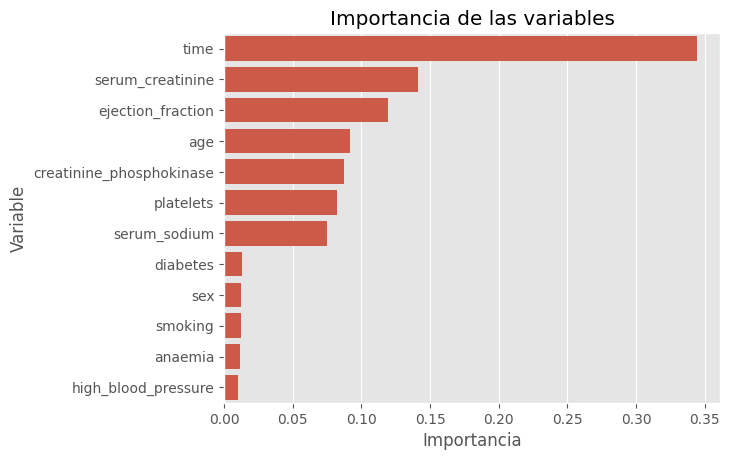

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Importancia de las variables con Random Forest
X = df_insuficiencia_cardiaca.drop(columns=target)
y = df_insuficiencia_cardiaca[target]

# Modelo para evaluar importancia
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Importancia de las características
importances = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\nRanking de importancia de las variables:")
print(importances)

# Gráfico de importancia
sns.barplot(x='Importancia', y='Variable', data=importances)
plt.title("Importancia de las variables")
plt.savefig(f"Relación_variables.png", format='png')
plt.show()


## Créditos
---

**Profesor**

- [Jorge E. Camargo, PhD](https://dis.unal.edu.co/~jecamargom/)

**Asistente docente**:

- [Juan S. Lara MSc](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/)

**Diseño de imágenes:**
- [Brian Chaparro Cetina](mailto:bchaparro@unal.edu.co).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*